In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# The Data Base 
"""
# ## Example: USDA Food Database
{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}
# In[1]:
"""

pd.options.display.max_rows = 100
db = json.load(open('foods-2011-10-03.json'))

print("Keys: ", db[0].keys())
print("Nutrient 0: ",db[0]['nutrients'][0])

Keys:  dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
Nutrient 0:  {'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


In [4]:

# Exploramos los nutrientes 
nutrients = pd.DataFrame(db[0]['nutrients'])
print(nutrients[:10])

# Data Frame con la info importante asociada a los nutrientes (se filtra el resto: tags, portions,...)
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

print("Info: ", info[:10])
pd.options.display.max_rows = 100
pd.value_counts(info.group)

# Lista de Data Frame de nutrientes
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
print(nutrients[:10])


                   description        group units    value
0                      Protein  Composition     g    25.18
1            Total lipid (fat)  Composition     g    29.20
2  Carbohydrate, by difference  Composition     g     3.06
3                          Ash        Other     g     3.28
4                       Energy       Energy  kcal   376.00
5                        Water  Composition     g    39.28
6                       Energy       Energy    kJ  1573.00
7         Fiber, total dietary  Composition     g     0.00
8                  Calcium, Ca     Elements    mg   673.00
9                     Iron, Fe     Elements    mg     0.64
Info:                                           description                   group  \
0                                    Cheese, caraway  Dairy and Egg Products   
1                                    Cheese, cheddar  Dairy and Egg Products   
2                                       Cheese, edam  Dairy and Egg Products   
3                       

In [5]:

nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

col_mapping = {'description' : 'food', 'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
ndata = pd.merge(nutrients, info, on='id', how='outer')
print(ndata.iloc[375173])


nutrient                 Fatty acids, total saturated
nutgroup                                        Other
units                                               g
value                                           0.072
id                                              43546
food            Babyfood, banana no tapioca, strained
fgroup                                     Baby Foods
manufacturer                                     None
Name: 375173, dtype: object


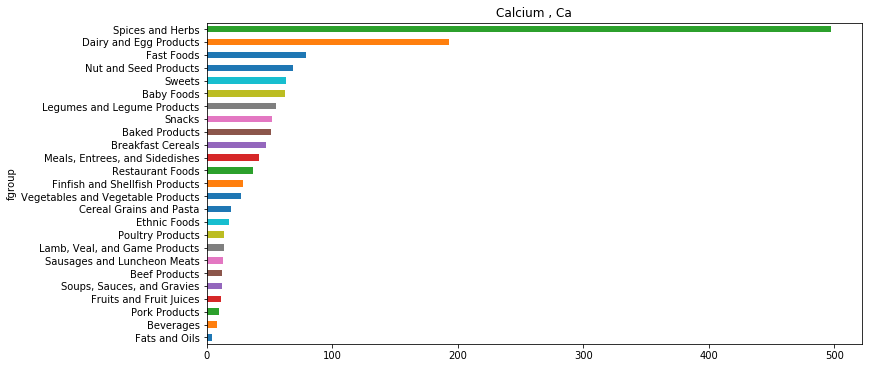

In [6]:

plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
#result['Zinc, Zn'].sort_values().plot(kind='barh')
result['Calcium, Ca'].sort_values().plot(kind='barh')
plt.title("Calcium , Ca")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()
